In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y=np.array(X[:,0]**2+X[:,1]<1.5,dtype='int')
for _ in range(20):
    y[np.random.randint(200)] = 1

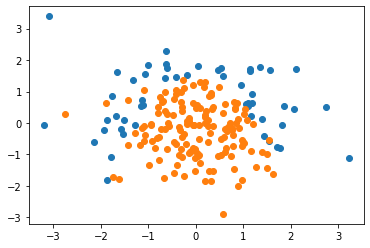

In [3]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)


### 使用scikit-learn 中的逻辑回归


In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [11]:
log_reg.score(X_train,y_train)

0.7933333333333333

In [12]:
log_reg.score(X_test,y_test)

0.86

In [13]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]

    y_predict = model.predict(X_new)
    zz=y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

<ipython-input-13-077fd7ed623f>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


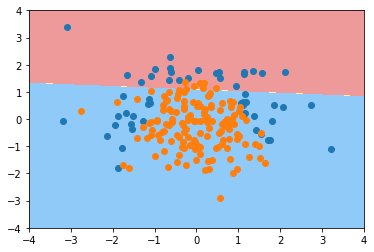

In [14]:
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression())
    ])


In [16]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train,y_train)


Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [17]:
poly_log_reg.score(X_train,y_train)


0.9066666666666666

In [18]:
poly_log_reg.score(X_test,y_test)

0.94

<ipython-input-13-077fd7ed623f>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


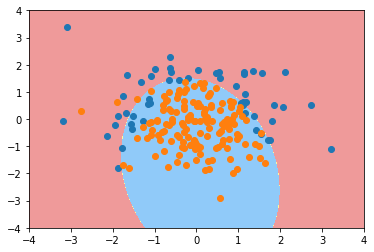

In [19]:
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [20]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train,y_train)


Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [21]:
poly_log_reg2.score(X_train,y_train)

0.94

In [22]:
poly_log_reg2.score(X_test,y_test)


0.92

<ipython-input-13-077fd7ed623f>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


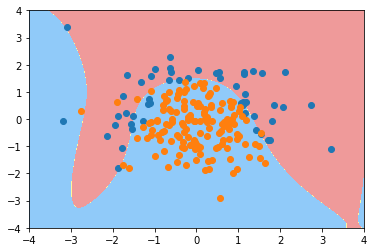

In [23]:
plot_decision_boundary(poly_log_reg2,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [24]:
def PolynomialLogisticRegression(degree,C):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C=C))
    ])


In [25]:
poly_log_reg3=PolynomialLogisticRegression(degree=20,C=0.1)

In [26]:
poly_log_reg3.fit(X_train,y_train)


Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(C=0.1))])

In [27]:
poly_log_reg3.score(X_train,y_train)

0.84

In [28]:
poly_log_reg3.score(X_test,y_test)

0.92

<ipython-input-13-077fd7ed623f>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


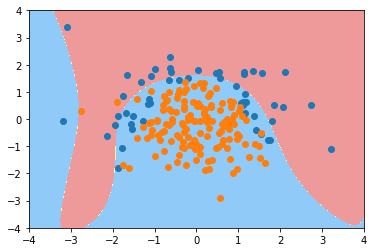

In [29]:
plot_decision_boundary(poly_log_reg3,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])


In [42]:
def PolynomialLogisticRegression(degree,C,penalty='l2',solver='liblinear'):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C=C,penalty=penalty,solver=solver))
    ])

In [43]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20,C=0.1,penalty='l1')

In [44]:
poly_log_reg4.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [45]:
poly_log_reg4.score(X_train,y_train)


0.8266666666666667

In [46]:
poly_log_reg4.score(X_test,y_test)

0.9

<ipython-input-13-077fd7ed623f>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


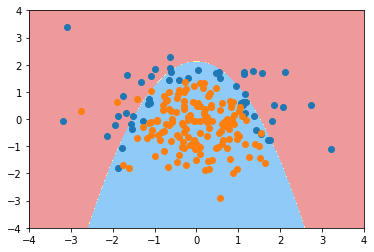

In [47]:
plot_decision_boundary(poly_log_reg4,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
